In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [3]:
def penalized_loss(y_true, y_pred):
    penalty = 100.0  # This value can be adjusted
    loss = tf.where(y_pred < 0, penalty * tf.square(y_true - y_pred), tf.square(y_true - y_pred))
    return tf.reduce_mean(loss, axis=-1)

In [4]:
# Load the data
data = pd.read_csv('D:\\bachelor\\customer_36.csv')

# Preprocess the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [5]:
# Split the data into training and testing sets
X = data.drop('consumption', axis=1)
y = data['consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets
# Assuming the data is hourly, 24*7 rows would make a week
X_train, X_test = X[:-24*7], X[-24*7:]
y_train, y_test = y[:-24*7], y[-24*7:]

X = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)
y = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1,1)), columns=[y.name])

In [6]:
# Define the architecture of the NN
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

d:\bachelor\BACH\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the NN with the custom loss function
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the NN
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 810.3521
Epoch 2/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3187
Epoch 3/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1632
Epoch 4/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1226
Epoch 5/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0801
Epoch 6/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 0.2538
Epoch 7/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 0.5620
Epoch 8/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 0.0281
Epoch 9/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 1.1599
Epoch 10/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.0391
Epoch 11/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 2.6264
Epoch 12/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 0.0260
Epoch 13/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 2.3839
Epoch 14/50
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.0168
Epoch 15/50
817/817 ━━━━━━━━━━━━━━━



Please replace `next_week_data` with the actual data for next week. The data should be preprocessed (normalized) in the same way as the training data.

In [8]:
# Evaluate the NN
loss = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: ', loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028  
Test Loss:  0.003037265967577696


In [9]:
# Predict solar production for the next week
next_week_prediction = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [10]:
next_week_prediction = scaler_y.inverse_transform(next_week_prediction)

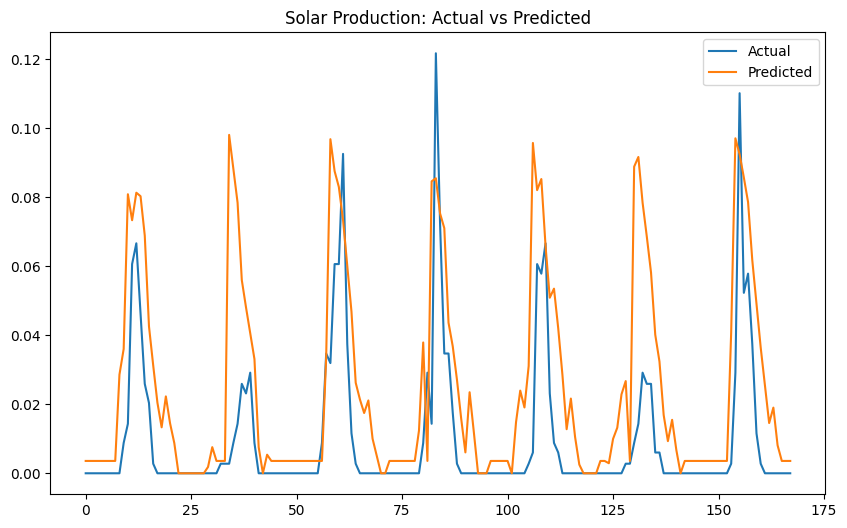

In [12]:
# Convert y_test to its original scale
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Set all negative predictions to 0
next_week_prediction = np.clip(next_week_prediction, 0, None)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(next_week_prediction, label='Predicted')
# plt.ylim(bottom=0)  # Set the lower limit of y-axis to 0
plt.legend()
plt.title('Solar Production: Actual vs Predicted')
plt.show()